<h1>Table of Contents<span class="tocSkip"></span></h1>

* [`symbolic_distribution`](#chapter0)
    - [Fig. 1](#section_fig1)
* [`missing_states`](#chapter1)
    - [Fig. 2](#section_fig2)
* [`permutation entropy`](#chapter2)
    - [Fig. 3](#section_fig3)
* [`complexity entropy`](#chapter3)
    - [Fig. 4](#section_fig4)
* [`tsallis_complexity entropy and renyi_complexity_entropy`](#chapter4)
    - [Fig. 5](#section_fig5)
    - [Fig. 6](#section_fig6)
* [`ordinal_network`](#chapter7)
    - [Fig. 7](#section_fig7)
* [`global_node_entropy`](#chapter8)
    - [Fig. 8](#section_fig8)
* [`missing_links`](#chapter9)
    - [Fig. 9](#section_fig9)

In [14]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import string
import glob
import warnings

#these modules are necessary to simulate colored noise and solve Rössler's system of equations. However, solutions used in the paper are saved in the 'data' folder.
import scipy.integrate
import scipy.signal
import colorednoise

#the igraph module is needed to draw directed ordinal networks. The networkx is used to drawing the undirected form of those networks.
import igraph
import networkx as nx

#extend notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:99.5% !important;} </style>"))

%run ../ordpy.py

In [15]:
#predefining figure style

sns.set_style("white")
sns.set_style({"xtick.direction": "out",
            "ytick.direction": "out"})

rcparams = {'font.family': 'sans-serif',
       'font.sans-serif': ['Helvetica'],
       'axes.labelsize': 28,
       'axes.titlesize': 28,
       'legend.fontsize': 20,
       'legend.handlelength': 1,
       'ytick.right': 'off',
       'xtick.top': 'off',
       'ytick.left': 'on',
       'xtick.bottom': 'on',
       'xtick.labelsize': '25',
       'ytick.labelsize': '25',
       'axes.linewidth': 2.5,
       'xtick.major.width': 1.8,
       'xtick.minor.width': 1.8,
       'xtick.major.size': 10, 
       'xtick.minor.size': 7,
       'xtick.major.pad': 10,
       'xtick.minor.pad': 10,
       'ytick.major.width': 1.8,
       'ytick.minor.width': 1.8,
       'ytick.major.size': 10,
       'ytick.minor.size': 7,
       'ytick.major.pad': 10,
       'ytick.minor.pad': 10,
       'axes.labelpad': 15,
       'axes.titlepad': 15,
       'axes.spines.right': False,
       'axes.spines.top': False,
       'figure.figsize': (9.1, 7.0),
       'lines.linewidth': 3
      }
mpl.rcParams.update(rcparams)

<span style="font-family:times; font-weight:bold; font-size:1.8em;">`symbolic_distribution`</span><a class="anchor" id="chapter0"></a>

<span style="font-family:times; font-weight:bold; font-size:1.4em;">Fig. 1</span><a class="anchor" id="section_fig1"></a>

In [ ]:
symbolic_distribution()

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(8.19, 12.6))

#random walk (theory): horizontal dashed black lines.
ax[0].hlines([0.25, 0.125, 0.125, 0.125, 0.125, 0.25], xmin=[i-.2 for i in range(6)], xmax=[i+.2 for i in range(6)], linestyle='--', linewidth=2, color='black', label='Theory')

#empirical distribution from a simulated walk.
rw = np.cumsum(np.random.normal(size=100000))
_, rw_probs_ = symbolic_distribution(rw, return_missing=True)
ax[0].vlines([i for i in range(6)], ymin=0, ymax=rw_probs_, color='#01665e', linewidth=13, alpha=.5)
ax[0].plot([i for i in range(6)], rw_probs_, 'o', markersize=13, color='#01665e', markeredgecolor='black', label='Simulation',alpha=.7)


ax[0].set_xticks([i for i in range(6)])
ax[0].set_xticklabels(['012', '021', '102', '120', '201', '210'])
ax[0].set_yticks([0,1/8,1/4])
ax[0].set_yticklabels(['0','$\dfrac{1}{8}$', '$\dfrac{1}{4}$'])
ax[0].set_ylabel('Probability, $p_i(\pi_i)$')
ax[0].spines['left'].set_smart_bounds(True)
ax[0].spines['bottom'].set_smart_bounds(True)
ax[0].legend(loc='upper center')
ax[0].annotate('random walk', (.50,.74),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                bbox={'boxstyle':'round', 'fc':'#f0f0f0', 'alpha':1})

########################################################
#logistic map (theory)
ax[1].hlines([1/3, 1/15, 2/15, 3/15, 4/15,0], xmin=[i-.2 for i in range(6)], xmax=[i+.2 for i in range(6)], linestyle='--', linewidth=2, color='black', label='Theory')

#simulation

logmap    = logistic_map(n=100000, x0=np.random.uniform())
_, probs_ = symbolic_distribution(logmap, return_missing=True)
ax[1].vlines([i for i in range(6)], ymin=0, ymax=probs_, color='#8c510a', linewidth=13, alpha=.5)
ax[1].plot([i for i in range(5)], probs_[:-1], 'o', markersize=13, color='#8c510a', markeredgecolor='black', label='Simulation',alpha=.7)

#plotting style
ax[1].set_xticks([i for i in range(6)])
ax[1].set_xticklabels(['012', '021', '102', '120', '201', '210'])
ax[1].set_yticks([1/3, 1/15, 2/15, 3/15, 4/15, 0])
ax[1].set_yticklabels(['$\dfrac{1}{3}$', '$\dfrac{1}{15}$', '$\dfrac{2}{15}$', '$\dfrac{3}{15}$', '$\dfrac{4}{15}$', '0'])
ax[1].set_ylabel('Probability, $p_i(\pi_i)$')
ax[1].spines['left'].set_smart_bounds(True)
ax[1].spines['bottom'].set_smart_bounds(True)
ax[1].annotate('logistic map', (.5,.74),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                bbox={'boxstyle':'round', 'fc':'#f0f0f0', 'alpha':1})
# ax[1].legend(loc=(.18,.65))
ax[1].legend(loc='upper center')

# plt.draw()
for (i, ax_), xcoord_ in zip(list(enumerate(ax)), [-0.182, -0.215]):    
    ax_.annotate('('+string.ascii_lowercase[i]+')', (xcoord_, 1.03), xycoords='axes fraction', fontsize=25, weight='bold')

f.tight_layout()
# f.savefig('figs-pdf/symbolic_distribution.pdf', dpi=300, bbox_inches='tight')

<span style="font-family:times; font-weight:bold; font-size:1.8em;">`missing_states`</span><a class="anchor" id="chapter1"></a>

In [ ]:
missing_states()

In [ ]:
#runs in 1 minute. Data to plot Fig 2b. Already saved in the 'data' folder.

# fstates_logmap = []

# for dx_ in [5,6]:
#     temp_amp = []
#     for amp_ in np.arange(0,.5,.001):
#         temp = []
#         for _ in range(10):
#             series = noisy_logistic(x0=np.random.uniform(), n=6000, amp=amp_)
#             temp.append(missing_states(series, dx=dx_,fraction=False)[1])
#         temp_amp.append(np.mean(temp))    
#     fstates_logmap.append(temp_amp)

# np.save('data/fstates_logmap.npy', fstates_logmap)

In [ ]:
#runs in 1 minute. Data to plot Fig 2a. Already saved in the 'data' folder.

# fstates_pure_logmap = []
# fstates_rw          = []

# for dx_ in [5,6]:
#     temp_size    = []
#     temp_size_rw = []
#     for n_ in np.arange(60, 6001, 90):
#         temp, temp_rw = [], []
#         for _ in range(10):
#             series = logistic_map(n=n_, x0=np.random.uniform())
#             temp.append(missing_states(series, dx=dx_, return_fraction=False)[1])
#             #
#             rws_ = np.cumsum(np.random.normal(size=n_))
#             temp_rw.append(missing_states(rws_, dx=dx_, return_fraction=False)[1])
#         #
#         temp_size.append(np.mean(temp))    
#         temp_size_rw.append(np.mean(temp_rw))    
#     fstates_pure_logmap.append(temp_size)
#     fstates_rw.append(temp_size_rw)

# np.save('data/fstates_pure_logmap.npy', fstates_pure_logmap)
# np.save('data/fstates_rw.npy', fstates_rw)

<span style="font-family:times; font-weight:bold; font-size:1.4em;">Fig. 2</span><a class="anchor" id="section_fig2"></a>

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(8.19, 12.6))

labels = ['$d_x = 5$', '$d_x = 6$']

#(a) logistic map whithout noise 
logi_leg = []
fstates_pure_logmap = np.load('data/fstates_pure_logmap.npy')
for y_, l_, c_, ms_ in zip(fstates_pure_logmap, labels, ['#bf812d', '#8c510a'], [9,12]):
    ax[0].plot(np.arange(60, 6001, 90), y_, '.', markersize=ms_, color=c_, label=l_, scalex='log')
    line, = ax[0].plot(np.arange(60, 6001, 90), y_, '.', markersize=ms_, color=c_, label=l_, scalex='log')
    logi_leg.append(line)

rw_leg = []
fstates_rw = np.load('data/fstates_rw.npy')
for y_, l_, c_, ms_ in zip(fstates_rw, labels, ['#35978f', '#01665e'], [10,15]):
    ax[0].plot(np.arange(60, 6001, 90), y_, '.', markersize=ms_, color=c_, label=l_, scalex='log')
    line, = ax[0].plot(np.arange(60, 6001, 90), y_, '.', markersize=ms_, color=c_, label=l_, scalex='log')
    rw_leg.append(line)

ax[0].set_ylabel("Number of missing\npatterns, $\eta$")
ax[0].set_xlabel("Time series length, $N$")
ax[0].set_xticks([60,2000,4000,6000])
ax[0].set_yticks(np.arange(0,601,150))
ax[0].hlines(fstates_rw[0][-1], 60, 6000, linestyle='--', linewidth=2, color='black')
ax[0].hlines(fstates_rw[1][-1], 60, 6000, linestyle='--', linewidth=2, color='black')
ax[0].hlines(fstates_pure_logmap[0][-1], 60, 6000, linestyle='--', linewidth=2, color='black')
ax[0].hlines(fstates_pure_logmap[1][-1], 60, 6000, linestyle='--', linewidth=2, color='black')

first_legend = plt.legend(handles=rw_leg, loc=(.383,1.84))
plt.gca().add_artist(first_legend)
second_legend = plt.legend(handles=logi_leg, loc=(.695,1.84))
plt.gca().add_artist(second_legend)

ax[0].annotate('logistic map', (.705,.7),  xycoords='axes fraction',fontsize=20,
                bbox={'boxstyle':'round', 'fc':'#f0f0f0', 'alpha':1})
ax[0].annotate('random walk', (.38,.7), xycoords='axes fraction',fontsize=20,
                bbox={'boxstyle':'round', 'fc':'#f0f0f0', 'alpha':1})



#(b) logistic + noise 
colors = ['#01665e', '#8c510a']
fstates_logmap = np.load('data/fstates_logmap.npy')
for y_, c_, l_,lw_ in zip(fstates_logmap, ['#dfc27d', '#8c510a'], labels, [4,6]):
    ax[1].plot(np.arange(0,.5,.001), y_, 'o', linewidth=lw_, color=c_, label=l_, scalex='log')

ax[1].hlines(0, 0, .5, linestyle='--', linewidth=2)
ax[1].set_yticks(np.arange(0,601,150))
ax[1].set_ylabel("Number of missing\npatterns, $\eta$")

ax[1].set_xticks(np.arange(0,.51,.1))
ax[1].set_xlabel(r"Noise amplitude, $\xi$")
ax[1].legend(loc=(.712,.44))
ax[1].annotate('noisy logistic map', (.777,.715),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                bbox={'boxstyle':'round', 'fc':'#f0f0f0', 'alpha':1})


plt.draw()
for (i, ax_), xcoord_ in zip(list(enumerate(ax)), [-0.275, -0.275]):    
    ax_.annotate('('+string.ascii_lowercase[i]+')', (xcoord_, 1.03), xycoords='axes fraction', fontsize=25, weight='bold')
    
f.tight_layout()
# f.savefig('figs-pdf/missing_states.pdf', dpi=300, bbox_inches='tight')

<span style="font-family:times; font-weight:bold; font-size:1.8em;">`permutation_entropy`</span><a class="anchor" id="chapter2"></a>

In [16]:
def logistic(a=4, n=100000, x0=0.4):
    """
    Iterates the logistic map.
    
    Parameters
    ----------
    x0: initial population ([0,1] interval)
    a : intrinsic growth rate (a >= 0; interesting in [0,4] because then, it 
        maps the orbit to the [0,1] interval to itself.)
    n : number of map iterations (length of the series).
    ----------
    Returns a logistic map orbit.
    """
    x    = np.zeros(n)
    x[0] = x0
    
    for i in range(n-1):
        x[i+1] = a*x[i]*(1-x[i])
        
    return x

In [17]:
def transient_logistic_map(x0=.65, r0 = 2.8):
    """
    Iterates the logistic map changing the
    growth parameter r at each step. Initial 
    conditions x0=.65, r(0)=2.8 and incremental 
    steps of 10e-5.
    
    Parameters
    ----------
    ----------
    Returns the corresponding transient 
    logistic map time series.
    
    References:
    -----------
    - Cao et al., Detecting dynamical changes in time series using the permutation entropy, 
    Phys. Rev. E 70, 046217 (2004);
    
    - L.L. Trulla et al., Recurrence quantification analysis of the logistic equation
    with transients, Phys. Letters A 223 (1996) 255-260.
    """
    x = [r0*x0*(1-x0)]
    i = 0
#    
    for r_ in np.arange(2.80001,4.00001,.00001):
        x += [r_*x[i]*(1-x[i])]
        i += 1
            
    return x

In [18]:
def normalize_array(x):
    """
    Normalizes an array between 0 and 1
    
    Parameters
    ----------
    x: a numpy array
    ----------
    Returns a normalized array.
    
    """
    x = x-x.min()
    return x/x.max()

In [ ]:
# 55 min to run. Data to plot Fig. 3d. Already saved in the 'data' folder.

# H_logistic = []
# xlog_      = np.linspace(3.5,4.,num=5001)
# for a in xlog_:
#     data = logistic(a)
#     H_logistic += [permutation_entropy(data, dx=6, base=2, normalized=False)]

# np.save("data/entropy_logistic.npy", H_logistic)

In [ ]:
# 30 seconds to run. Data to plot Fig. 3a. Only last 10000 data points are used to avoid too dense plot. Already saved in the 'data' folder.

# logistic_bp = []
# for r in np.linspace(3.5,4.,num=501):
#     logistic_bp.append(logistic(a=r, x0=np.random.uniform())[90000:])
# np.save('data/logistic_bp.npy', logistic_bp)

In [ ]:
#24 minutes to run. Data to plot Fig 3e. Already saved in the 'data' folder.

# ts_tlogmap = transient_logistic_map()

# h_tlogmap_tau1 = []
# h_tlogmap_tau2 = []

# for i in range(0,120001-1023):
#     ts_window  = ts_tlogmap[i:i+1024]
#     h_tlogmap_tau1.append(permutation_entropy(ts_window, dx=5))
#     h_tlogmap_tau2.append(permutation_entropy(ts_window, dx=5, tau_x=2))    

# np.save('data/h_tlogmap_tau1.npy', np.concatenate((np.zeros(1023), h_tlogmap_tau1)))
# np.save('data/h_tlogmap_tau2.npy', np.concatenate((np.zeros(1023), h_tlogmap_tau2)))

# h_tlogmap_tau1 = np.load('data/h_tlogmap_tau1.npy')
# h_tlogmap_tau2 = np.load('data/h_tlogmap_tau2.npy')

In [ ]:
#30 seconds to run. Data to plot Fig 3f. Already saved in the 'data' folder.

# h2d_ising = []
# c2d_ising = []

# for dx_, dy_ in [[3,2], [2,3]]:
#     temp, temp2 = [], []
#     for path in sorted(glob.glob('data/ising-surfaces-pickles/100000ising*')):
#         surface_ = np.load(path)
#         h_, c_   = complexity_entropy(surface_, dx=dx_, dy=dy_)
#         temp.append(h_)
#         temp2.append(c_)
#     h2d_ising.append(temp)
#     c2d_ising.append(temp2)

# np.save('data/h2d_ising.npy',h2d_ising)
# np.save('data/c2d_ising.npy',c2d_ising)

<span style="font-family:times; font-weight:bold; font-size:1.4em;">Fig. 3</span><a class="anchor" id="section_fig3"></a>

In [ ]:
f        = plt.figure(figsize=(24.57, 12.6))
spec     = f.add_gridspec(ncols=6, nrows=4)
ax       = []
for row in range(2): 
    for col in range(3):
        if not (row==0 and col==2):
            ax.append(f.add_subplot(spec[row*2:2*row+2, col*2:2*col+2]))
        else:
            ax.append([f.add_subplot(spec[0:1,4:5]), f.add_subplot(spec[0:1,5:6]), f.add_subplot(spec[1:2,4:5]), f.add_subplot(spec[1:2,5:6])])

            
#bifurcation logistic map (a)
logistic_bp      = np.load('data/logistic_bp.npy')
for r, y in zip(np.linspace(3.5,4.,num=501), logistic_bp):
    ax[0].plot(np.full(10000, r), y, '.', markersize=.11, color='#01665e', alpha=.2, rasterized=True)
    ax[0].set_ylabel('Population, $x$')
    ax[0].set_xlabel('Parameter, $r$')
    ax[0].set_xticks(np.arange(3.5,4.05,.1).round(decimals=1))

    
#transient logistic map (b)
y = transient_logistic_map()
ax[1].plot(np.arange(2.8,4,.00001), y, '.', markersize=.2, color='#01665e', rasterized=True)
ax[1].set_ylabel('Population, $x[r(t)]$')
ax[1].set_xlabel('Parameter, $r(t)$')
ax[1].set_xticks(np.arange(2.8,4.05,.2).round(decimals=1))


#ising surfaces (c)
ising2d8  = normalize_array(np.load('data/ising-surfaces-pickles/100000ising0.8.npy'))
ising2d9  = normalize_array(np.load('data/ising-surfaces-pickles/100000ising0.9.npy'))
ising2d10 = normalize_array(np.load('data/ising-surfaces-pickles/100000ising1.0.npy'))
ising2d11 = normalize_array(np.load('data/ising-surfaces-pickles/100000ising1.1.npy'))

for ax_, s_,T in zip(ax[2], [ising2d8, ising2d9, ising2d10, ising2d11], [0.8, 0.9, 1.0, 1.1]): 
    ax_.imshow(s_, cmap='BrBG', interpolation='nearest', rasterized=True)
    ax_.annotate('$T = {}$'.format(T), (.5, -0.2),  va='center', ha='center', xycoords='axes fraction', fontsize=20)
    ax_.axis('off')
    
    pos = ax_.imshow(s_, cmap='BrBG')
#green is higher than brown
# f.colorbar(pos, ax=ax[2][3], aspect=10)


#entropy logistic map (d)
entropy_logistic = np.load("data/entropy_logistic.npy")

ax[3].plot(np.linspace(3.5,4.,num=5001), entropy_logistic/5, '.', markersize=2.5, color='#01665e', label=r'$d_x = 6$', rasterized=True)
ax[3].set_xlabel('Parameter, $r$')
ax[3].set_ylabel('Permutation entropy \n per symbol, $h_6$', multialignment='center')
# ax[3].annotate(r'$d_x = 6$', (.1, .91),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
#                bbox={'boxstyle':'round', 'fc':'white', 'alpha':1, 'ec':'#d9d9d9'})
ax[3].legend(handletextpad=0, markerscale=3)
ax[3].set_xticks(np.arange(3.5,4.05,.1).round(decimals=1))


#entropy transient logistic map (e)
h_tlogmap_tau1 = np.load('data/h_tlogmap_tau1.npy')
h_tlogmap_tau2 = np.load('data/h_tlogmap_tau2.npy')
x_tlogmap      = np.arange(2.8000,4.00001,.00001)

for y_, l_, c_ in zip([h_tlogmap_tau1, h_tlogmap_tau2], [r'$d_x = 5, \tau_x = 1$', r'$d_x = 5, \tau_x = 2$'], ['#01665e', '#8c510a']):
    if l_==r'$d_x = 5, \tau_x = 2$':
        ax[4].plot(x_tlogmap, y_, linewidth=3, label=l_, color=c_, rasterized=True, zorder=0)
    else:
        ax[4].plot(x_tlogmap, y_, linewidth=2, label=l_, color=c_, rasterized=True)
    ax[4].set_xlabel('Parameter, $r(t)$')
    ax[4].set_ylabel('Permutation entropy, $H[r(t)]$')
    ax[4].set_xlim(left=2.8)
    ax[4].legend()
#     ax[4].annotate(r'$d_x = 5$', (.185, .695),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
#              bbox={'boxstyle':'round', 'fc':'white', 'alpha':1, 'ec':'#d9d9d9'})
    ax[4].set_xticks(np.arange(2.8,4.05,.2).round(decimals=1))
    
    
#entropy ising surfaces
h2d_ising = np.load('data/h2d_ising.npy')
x_ising   = np.arange(0.5,3.05,0.1).round(decimals=2)

for y_, c_, m_, ms_, l_ in zip(h2d_ising, ['#01665e', '#8c510a'], ['s', 'o'], [10,8], ['$d_x = 3$\n$d_y=2$', '$d_x = 2$\n$d_y=3$']):
    ax[5].plot(x_ising, y_, '-o', marker=m_, markersize=ms_, color=c_, label=l_)
    ax[5].set_xlabel('Reduced temperature, $T_r$')
    ax[5].set_ylabel('Permutation entropy, $H$')
    ax[5].legend()

    
plt.draw()
for (i, ax_), cnt in zip(list(enumerate(ax[:2]+[ax[2][0]]+ax[3:])), range(6)):    
    if not cnt==2:
        x_, y_ = ax_.transAxes.inverted().transform(ax_.yaxis.get_label().get_transform().transform(ax_.yaxis.get_label().get_position()))
        ax_.annotate('('+string.ascii_lowercase[i]+')', (x_-.04, y_+.6), xycoords='axes fraction', ha='center',va='top', fontsize=30, weight='bold')
    else: 
        pass
    
f.tight_layout()
# f.savefig('figs-pdf/permutation_entropy_beta.pdf', dpi=300, bbox_inches='tight')
# f.savefig('figs-pdf/permutation_entropy_beta.svg', dpi=300, bbox_inches='tight')

<span style="font-family:times; font-weight:bold; font-size:1.8em;">`complexity_entropy`</span><a class="anchor" id="chapter3"></a>

In [19]:
#Skew tent map
def skew_tent_map(n=2**15, omega=0.1847, x0=.5):
    """
    Iterates the Skew tent map.
    
    Parameters
    ----------
    n     : time series length.
    omega : map parameter.
    x0    : initial condition.
    ----------
    Returns an array corresponding to a 
    time series.
    """
    x    = np.zeros(n)
    x[0] = x0
    
    for i in range(1, len(x)):
        if x[i-1] < omega:
            x[i] = x[i-1]/omega
        else:
            x[i] = (1-x[i-1])/(1-omega)
    
    return x

In [20]:
#Logistic map
def logistic_map(n=2**15, r=4, x0=0.4):
    """
    Iterates the logistic map.
    
    Parameters
    ----------
    n  : number of map iterations (length of the series).
    x0 : initial population ([0,1] interval)
    r  : intrinsic growth rate (r >= 0; interesting in [0,4] because then, it 
         maps the orbit to the [0,1] interval to itself.)
    ----------
    Returns a logistic map orbit.
    """
    x    = np.zeros(n)
    x[0] = x0
    
    for i in range(n-1):
        x[i+1] = r*x[i]*(1-x[i])
        
    return x

In [21]:
#Henon's map
def henon_map(n=2**15, a=1.4, b=0.3, x0=.5, y0=.5):
    """
    Paramenters
    -----------
    n  : time series length.
    a  : map parameter.
    b  : map parameter.
    x0 : initial condition.
    y0 : initial condition.
    -----------
    
    Returns the x and y variables of Henón's map.
    """
    with warnings.catch_warnings():
        warnings.simplefilter("error")
            
        bool_ = False
        while bool_==False:        
            try:
                x    = np.zeros(n)
                y    = np.zeros(n)

                x[0] = x0
                y[0] = y0

                for i in range(1, n):
                    x[i] = 1 - a*x[i-1]**2 + y[i-1]
                    y[i] = b*x[i-1]

                bool_ = True

            except RuntimeWarning: #changes the random inital condition
                x0 = np.random.uniform()
                y0 = np.random.uniform()

    return x, y

In [22]:
#Schuster's map
def schuster_map(n=2**15, z=2, x0=.5):
    """
    
    Parameters
    ----------
    n : time series length
    z :  map parameter
    ----------
    Returns an orbit of an iterated Schuster map.
    """
    z    = float(z)
    x    = np.zeros(n)
    x[0] = x0
    
    for i in range(1, n):
        x[i], _ = np.modf(x[i-1] + x[i-1]**z)
    
    return x

<span style="font-family:times; font-weight:bold; font-size:1.4em;">Fig. 4</span><a class="anchor" id="section_fig4"></a>

In [ ]:
#30 seconds to run. Data to plot Fig. 4.

#TIME SERIES DATA
#Chaotic Maps (empty markers)

hc_stentmap            = np.mean([complexity_entropy(skew_tent_map(x0=np.random.uniform()), dx=6) for _ in range(10)], axis=0)
hc_henon_x, hc_henon_y = np.mean([[complexity_entropy(x_, dx=6), complexity_entropy(y_, dx=6)] for x_,y_ in [(henon_map(x0=np.random.uniform(), y0=np.random.uniform())) 
                                                                                               for _ in range(10)]], axis=0)
hc_logistic            = np.mean([complexity_entropy(logistic_map(x0=np.random.uniform()), dx=6) for _ in range(10)], axis=0)
hc_schuster            = np.mean([[complexity_entropy(schuster_map(z=z_,x0=np.random.uniform()), dx=6) for _ in range(10)] for z_ in [3/2,2,5/2]], axis=1)


#Stochastic processes (filled markers)

#either run or load, to get the k-noise data. To run, you have to install the colorednoise module - https://github.com/felixpatzelt/colorednoise
# hc_knoise = np.mean([[complexity_entropy(colorednoise.powerlaw_psd_gaussian(exponent=k_, size=2**15), dx=6) for _ in range(10)] for k_ in np.arange(0,3.1,.25).round(decimals=2)], axis=1)
hc_knoise = np.load('data/hc_knoise.npy')

hc_fbm    = np.load('data/hc_fbm.npy')
hc_fgn    = np.load('data/hc_fgn.npy')


#theoretical curves
hc_max_curve = maximum_complexity_entropy(dx=6).T
hc_min_curve = minimum_complexity_entropy(dx=6, size=719).T



#IMAGE DATA
pollock   = mpimg.imread('data/number-1-lavender-mist-1950.jpg')
reinhardt = mpimg.imread('data/abstract-painting-blue-1953.jpg')
amaral    = mpimg.imread('data/abaporu-1928.jpg')

hc_paintings = np.asarray([complexity_entropy(painting, dx=2, dy=2) for painting in [pollock.mean(axis=2), reinhardt.mean(axis=2), amaral.mean(axis=2)]])

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(9.1, 14.0))

hc_data = [hc_stentmap, hc_henon_x, hc_logistic, hc_schuster, hc_knoise, hc_fbm, hc_fgn]
labels  = ['Skew Tent Map', 'Henon Map', 'Logistic Map',
           'Schuster Map', 'K-Noise', 'fBm', 'fGn']
markers = ['o', 's', '^', 'd', 's', '^', 'v', ]

colors = ['#f6e8c3', '#dfc27d', '#bf812d', '#8c510a', '#f5f5f5', '#80cdc1', '#01665e']


for data_, marker_,color_, label_, cnt in zip(hc_data, markers, colors, labels, range(len(hc_data))):
#point plotting
    h_, c_ = data_.T
    ax[0].plot(h_, c_, marker_, markersize=13, markeredgecolor='black', color=color_, label=label_)

#dotted black line connecting dots
    if cnt>2:
        ax[0].plot(h_, c_, '--', linewidth=1, color='black', zorder=0)
        
#annotations
        if cnt==3: #schuster map
            for tx_,x_, y_ in zip(['3/2', '2', '5/2'], h_+np.asarray([.025]*3), c_+np.asarray([-.005]*3)):
                ax[0].annotate('$z = {}$'.format(tx_), xy=(x_, y_), fontsize=15, color=colors[3])
        if cnt==4: #colored noise
            adjx_ = [0.015, 0.025,-.005,0.0]
            adjy_ = [-0.00,-0.005,0.015,  .015]
            ncnt  = 0
            for n_, x_, y_ in zip(np.arange(0,3.1,.25).round(decimals=2), h_, c_):
                if n_ in [0,1,2,3]:
                    ax[0].annotate('$k = {}$'.format(int(n_)), xy=(x_+adjx_[ncnt],y_+adjy_[ncnt]), fontsize=15, color='black')
                    ncnt += 1     
        if cnt==5: #fBm
            for tx_,x_, y_,adjx_, adjy_ in zip(['0.1','0.5','0.9'], h_[[0,4,8]], c_[[0,4,8]], [-.14,-.13,-.04], [-0.008,-0.010,-0.03]):
                ax[0].annotate(r'$h = {}$'.format(tx_), xy=(x_+adjx_,y_+adjy_), fontsize=15, color='black')
    
ax[0].legend(frameon=False, loc=(0,.85),ncol=2, fontsize=15)
ax[0].set_ylim(bottom=0,top=.51)
ax[0].set_xlim(left=0, right=1.06)

#theoretical curves
hmin, cmin = hc_min_curve #(this variable is defined in the cell above)
hmax, cmax = hc_max_curve #(this variable is defined in the cell above)
ax[0].plot(hmin, cmin, linewidth=1.5, color='black', zorder=0)
ax[0].plot(hmax, cmax, linewidth=1.5, color='black', zorder=0)
    
ax[0].set_ylabel('Statistical complexity, $C$')
ax[0].set_xlabel('Permutation entropy, $H$')
ax[0].annotate('$d_x = 6$', (.5, .2),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                bbox={'boxstyle':'round', 'fc':'white', 'alpha':1, 'ec':'#d9d9d9'})


########################################################

painting_colors = ['#01665e', '#737373', '#8c510a']
for (h_, c_), cl_, (xoff,yoff), tx_, painting, (xcoord_, ycoord_), zoom_ in zip(hc_paintings, painting_colors, [(-.095,0), (.015,0), (-.095,0)], 
                                                                                ['Pollock', 'Reinhardt', 'Amaral'], [pollock, reinhardt, amaral], 
                                                                                [(.92,.0713), (.46,.175), (.83,.193)], [.1,.2,.1]):
    ax[1].plot(h_, c_, 'o', markersize=13, markeredgecolor='black', color=cl_)
    ax[1].annotate(tx_, xy=(h_+xoff, c_+yoff), fontsize=18, weight='bold')
    
    box = mpl.offsetbox.OffsetImage(painting, zoom=zoom_)
    pic = mpl.offsetbox.AnnotationBbox(box, (xcoord_, ycoord_))
    ax[1].add_artist(pic)
    
ax[1].annotate('$d_x = 2$\n$d_y=2$', (.5, .2),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                bbox={'boxstyle':'round', 'fc':'white', 'alpha':1, 'ec':'#d9d9d9'})

ax[1].set_xlabel('Permutation entropy, $H$')
ax[1].set_ylabel('Statistical complexity, $C$')
     
plt.draw()
for (i, ax_), x_ in zip(list(enumerate(ax)), [-.2,-.227]):    
    ax_.annotate('('+string.ascii_lowercase[i]+')', (x_,1.07), xycoords='axes fraction', fontsize=25, weight='bold')


f.tight_layout()
f.savefig('figs-pdf/complexity_entropy.pdf', dpi=300, bbox_inches='tight')

<span style="font-family:times; font-weight:bold; font-size:1.8em;">`tsallis_complexity_entropy` and `rényi_complexity_entropy`</span><a class="anchor" id="chapter4"></a>

In [ ]:
# 30 seconds to run. Data to plot Fig 5.

logmap_dx3_probs = [1/3, 1/15, 4/15, 2/15, 1/5, 0]
rw_dx3_probs     = [0.25, 0.125, 0.125, 0.125, 0.125, 0.25]
logistic_ts      = logistic_map(n=1100000,x0=np.random.uniform())[100000:]
rw_ts            = np.cumsum(np.random.normal(size=1000000))


#Tsallis curves
h_theory_logmap_tsallis, c_theory_logmap_tsallis = tsallis_complexity_entropy(logmap_dx3_probs, q=np.logspace(-2,2,num=1000), dx=3, probs=True).T
h_exp_logmap_tsallis, c_exp_logmap_tsallis       = tsallis_complexity_entropy(logistic_ts, q=np.logspace(-2,2,num=1000)).T

h_theory_rw_tsallis, c_theory_rw_tsallis = tsallis_complexity_entropy(rw_dx3_probs, q=np.logspace(-3,2,num=1000), dx=3, probs=True).T
h_exp_rw_tsallis, c_exp_rw_tsallis       = tsallis_complexity_entropy(rw_ts, q=np.logspace(-3,2,num=1000), dx=3).T


#Rényi curves
h_exp_logmap_renyi, c_exp_logmap_renyi       = renyi_complexity_entropy(logistic_ts, alpha=np.logspace(-2,2,num=1000), dx=4).T
h_exp_rw_renyi, c_exp_rw_renyi       = renyi_complexity_entropy(rw_ts, alpha=np.logspace(-3,2,num=1000), dx=4).T

<span style="font-family:times; font-weight:bold; font-size:1.4em;">Fig. 5</span><a class="anchor" id="section_fig5"></a>

In [ ]:
#reestructuring the data
logmap_tsallis = [(h_theory_logmap_tsallis, c_theory_logmap_tsallis), (h_exp_logmap_tsallis, c_exp_logmap_tsallis)]
rw_tsallis     = [(h_theory_rw_tsallis, c_theory_rw_tsallis), (h_exp_rw_tsallis, c_exp_rw_tsallis)]

labels_ = [(r'Permutation entropy, $H_q$', r'Statistical complexity, $C_q$')]*2

#plotting
f, ax = plt.subplots(nrows=2,ncols=1,figsize=(8.372, 12.88))

for data, ax_,(xcoord, ycoord), tx_, (xoff, yoff), (xl_, yl_), k in zip([logmap_tsallis, rw_tsallis], ax.flatten(), 
                                                                        [(.83,.1), (.2,.1)], ['logistic map', 'random walk'],
                                                                        [(.878,.21), (.145,.21)], labels_, range(2)):                                                                 
    for (x_, y_), i, cl_ in zip(data, range(2), ['#01665e', '#8c510a']):
        if k==0: #avoids repeating the labels 'Simulated' and 'Theory'in each panel.
            if i==1:
                ax_.plot(x_, y_, label='Simulation', linewidth=3, color=cl_, zorder=0)
                ax_.legend()
            else:
                ax_.plot(x_, y_, label='Theory', dashes=(2,3), linewidth=5, color=cl_)
                ax_.legend()
        else:
            if i==1:
                ax_.plot(x_, y_, linewidth=3, color=cl_, zorder=0)
            else:
                ax_.plot(x_, y_, dashes=(2,3), linewidth=5, color=cl_)
                
    ax_.set_ylabel(yl_)
    ax_.set_xlabel(xl_)
    ax_.annotate(tx_, (xcoord,ycoord),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                 bbox={'boxstyle':'round', 'fc':'#f0f0f0', 'alpha':1})
    ax_.annotate('$d_x = 3$', (xoff,yoff),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                 bbox={'boxstyle':'round', 'fc':'white', 'ec':'#d9d9d9', 'alpha':1})
    
#
ax[0].plot(h_exp_logmap_tsallis[0], c_exp_logmap_tsallis[0], '*', color='black', markersize=12, zorder=2)
ax[0].plot(h_exp_logmap_tsallis[-1], c_exp_logmap_tsallis[-1],'.',color='black', markersize=15, zorder=2)

#
# ax[1].plot(h_exp_rw_tsallis[0], c_exp_rw_tsallis[0], '*', color='black', markersize=12, zorder=2)
ax[1].plot(h_exp_rw_tsallis[-1], c_exp_rw_tsallis[-1], '.',color='black', markersize=15, zorder=2)
    
plt.draw()
for (i, ax_), x_ in zip(list(enumerate(ax.flatten())), [-.255,-.255,-.222,-.25]):    
    ax_.annotate('('+string.ascii_lowercase[i]+')', (x_, 1.05), xycoords='axes fraction', fontsize=25, weight='bold')
        
f.tight_layout()
# f.savefig('figs-pdf/tsallis_complexity_entropy.pdf', dpi=300, bbox_inches='tight')

<span style="font-family:times; font-weight:bold; font-size:1.4em;">Fig. 6</span><a class="anchor" id="section_fig6"></a>

In [ ]:
#reestructuring the data

renyi_data    = [[h_exp_logmap_renyi, c_exp_logmap_renyi], [h_exp_rw_renyi, c_exp_rw_renyi]]
renyi_labels_ = [(r'Permutation entropy, $H_\alpha$', r'Statistical complexity, $C_\alpha$')]*2
colors_       = ['#8c510a', '#01665e']
processes     = ['logistic map', 'random walk']

#plotting
f, ax = plt.subplots(nrows=2,ncols=1,figsize=(8.372, 12.88))

for ax_, data, (xcoord, ycoord), tx_, (xoff, yoff), (xl_, yl_), cl_,k in zip(ax.flatten(), renyi_data, [[.18,.1], [.2,.1]], processes,
                                                                             [[.135,.21], [.145,.21]], renyi_labels_, colors_, range(2)):        
    x_, y_ = data
    ax_.plot(x_, y_, linewidth=5, color=cl_, zorder=0)
#     ax_.legend()
    ax_.set_ylabel(yl_)
    ax_.set_xlabel(xl_)
    ax_.annotate(tx_, (xcoord,ycoord),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                 bbox={'boxstyle':'round', 'fc':'#f0f0f0', 'alpha':1})
    ax_.annotate('$d_x = 4$', (xoff,yoff),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
                 bbox={'boxstyle':'round', 'fc':'white', 'ec':'#d9d9d9', 'alpha':1})
    
#
ax[0].plot(h_exp_logmap_renyi[0], c_exp_logmap_renyi[0], '*', color='black', markersize=15, zorder=2)
ax[0].plot(h_exp_logmap_renyi[-1], c_exp_logmap_renyi[-1],'.',color='black', markersize=20, zorder=2)

#
ax[1].plot(h_exp_rw_renyi[0], c_exp_rw_renyi[0], '*', color='black', markersize=15, zorder=2)
ax[1].plot(h_exp_rw_renyi[-1], c_exp_rw_renyi[-1], '.',color='black', markersize=20, zorder=2)
    
plt.draw()
for (i, ax_), x_ in zip(list(enumerate(ax.flatten())), [-.25,-.222]):    
    ax_.annotate('('+string.ascii_lowercase[i]+')', (x_, 1.05), xycoords='axes fraction', fontsize=25, weight='bold')
        
f.tight_layout()
# f.savefig('figs-pdf/renyi_complexity_entropy.pdf', dpi=300, bbox_inches='tight')

<span style="font-family:times; font-weight:bold; font-size:1.8em;">`ordinal_network`</span><a class="anchor" id="chapter7"></a>

In [23]:
#Rössler system
def rossler_equations_with_params(t, y, alpha, beta, gamma):
    """
    Right hand side of Rössler's equations
    which are defined as

    x' = - y - z
    y' = x + ay
    z' = b + z(x - c).
    
    with the prime denoting the derivative of the variable.

    Parameters
    ----------
    t : time.
    y : state vector of variables x, y and z.
    ----------

    Returns the right hand side of Rössler's system 
    as a list.
    """
#equations' variables
    x1, x2, x3 = y

#creating f = (x', y', z'): right hand side of Rössler's oscillator.
    return [-x2-x3, x1+alpha*x2, beta + x3*(x1-gamma)]

In [ ]:
# # Solving the Rössler system. Results already saved in the 'data' folder.

# # solving. 20 seconds to solve.

# rossler_curve = scipy.integrate.solve_ivp(rossler_equations_with_params, 
#                                           t_span = (0, 20000), 
#                                           y0=[np.random.uniform() for _ in range(3)], 
#                                           dense_output=True,
#                                           args=(.3, 2, 4),
#                                           atol=1.0e-8, 
#                                           rtol=1.0e-6)
# #x-coordinate time series
# xrossler          = rossler_curve.y[0]
# #.2 time sampling
# xrossler = rossler_curve.sol(np.arange(0,20000,.2))[0]
# np.save('data/xrossler0.3.npy'.format(alpha_), xrossler)

In [24]:
def igraph_directed_ordnet(data, dx=3, dy=1, tau_x=1, tau_y=1, normalized=True, overlapping=True, connections="all"):
    """
    Generates the elements (nodes, edges and edge weights) necessary to 
    obtain an ordinal network from data.
    
    Parameters
    ----------
    data        : array object in the format [x_1, x_2, x_3, ..., x_n] 
                  or [[x_11, x_12, x_13, ..., x_1m], 
                      [x_21, x_22, x_23, ..., x_2m], ..., 
                      [x_n1, x_n2, x_n3, ..., x_nm]] (nxm);
    dx          : embedding dimension (horizontal axis) (default: 3).
    dy          : embedding dimension (vertical axis); must be 1 for time series (default: 1).
    tau_x       : embedding delay (horizontal axis) (default: 1).
    tau_y       : embedding delay (vertical axis) (default: 1).
    normalized  : if True, edge weights represent transition probabilities between permutations.
                  If False, edge weights are transition counts.
    overlapping : if True, partitions data into overlapping sliding windows (default: True);
                  if False, it does not. 
    directed    : if True, ordinal network links are directed (default: True); if False, edges
                  correspond to an undirected network (avoids networks with multiedges).
    connections : whether the ordinal network is constructed using "all" permutation successions 
                  in symbolic sequence or only "horizontal" or "vertical" successions (default: 
                  "all"). ONLY VALID FOR IMAGE DATA. 
    ----------
    Returns a list of arrays containing the nodes, edges and edge weights
    corresponding to an ordinal network mapped from data.
    """
    nodes, edges, weights = ordinal_network(data, dx, dy, tau_x, tau_y, normalized, 
                                            overlapping, True, connections)
    
    g = igraph.Graph(directed=True)
    g.add_vertices(nodes)
    g.add_edges(edges)
    g.vs["label"]  = nodes
    g.es["weight"] = weights
    
    return g

def igplot_black(g, edge_width_scale=20, layout='layout_circle', vertex_font_size=20, box=(400,400), margin=(80, 80, 80, 80), 
                 vertex_size=50,edge_arrow_size=1, export_file=None, seed=None, vertex_label_color='#969696', vertex_color='#9970ab'):
    """
    Plots a graph with black edges instead of the 
    ususal procedure used by the igplot function
    defined elsewhere.
    
    Parameters
    ----------
    ----------
    Returns
    
    """
    plottedg = igraph.plot(
        g,
        export_file,
        layout=getattr(g,layout)(),
        bbox=box,
        vertex_label = [s.replace('|','') for s in g.vs['label']],#g.vs['label'], #[s.replace('|','') for s in g.vs['label']],
        vertex_label_size=vertex_font_size,
        vertex_label_color=vertex_label_color,
        margin=margin,
        vertex_size=vertex_size,
        vertex_color=vertex_color,
        edge_curved=True,
        edge_color          = list(map(mpl.colors.to_hex, list(map(mpl.cm.get_cmap(name='Greys'),0.4+normalize_array(np.asarray(g.es['weight'])))))),
        edge_width=((0.3+edge_width_scale*np.asarray(g.es['weight']))).tolist(),
        edge_arrow_size=edge_arrow_size,
    )
    return(plottedg)

def ornament_function(angle=135, omega=9, size=2040, probability=0):
    """
    Periodic ornament defined in "Discriminating image textures 
    with multiscale two-dimensional complexity-entropy
    causality plane" by Zunino and Ribeiro (Chaos, Solitons and Fractals, 
    2016).
    
    Parameters
    ----------
    angle      : inclination of the ornament's stripes.
    omega      : frequency (number of black stripes > 0).
    size       : lattice size (size x size).
    probability: probability of permuting pixels in the 
                 original ornament (e.g. 0.05, 0.25, 0.5).
    ----------
    Returns a bidimensional np.array (matrix).
    """
    if probability==0:
        angle  = np.math.pi*angle/180 - np.math.pi/2
        omega  = omega/np.math.pi*2

        x      = np.linspace(0, 2*np.math.pi, size)
        y      = np.linspace(0, 2*np.math.pi, size)
        xx, yy = np.meshgrid(x, y)

        z      = np.sin(omega*xx*np.cos(angle) - omega*yy*np.sin(angle))

        return z
#
    else:
        angle  = np.math.pi*angle/180 - np.math.pi/2
        omega  = omega/np.math.pi*2

        x      = np.linspace(0, 2*np.math.pi, size)
        y      = np.linspace(0, 2*np.math.pi, size)
        xx, yy = np.meshgrid(x, y)
        
        z      = np.sin(omega*xx*np.cos(angle) - omega*yy*np.sin(angle))
        nx, ny = z.shape
        z      = z.flatten()

        random         = np.random.randint(0,99, size=size*size)
        args_to_change = np.argwhere(random<int(probability*100)).flatten()
        np.random.shuffle(args_to_change)

        for i,j in zip(args_to_change[:-1:2], args_to_change[1::2]):
            temp = z[j]
            z[j] = z[i]
            z[i] = temp

        z = z.reshape(nx, ny)
        
        return z

<span style="font-family:times; font-weight:bold; font-size:1.4em;">Fig. 7</span><a class="anchor" id="section_fig7"></a>

In [ ]:
f        = plt.figure(figsize=(24.57, 12.6))
spec     = mpl.gridspec.GridSpec(ncols=9, nrows=6, figure=f)

subspec  = [mpl.gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=spec[0:2,0:3]), 
            mpl.gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=spec[0:2,3:6]), 
            mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=spec[0:2,6:9]),
            mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=spec[2:6,0:3]), 
            mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=spec[2:6,3:6]), 
            mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=spec[2:6,6:9])]

ax  = [f.add_subplot(subspec[0][0:2,2:5]), f.add_subplot(subspec[1][0:2,2:5])] + [f.add_subplot(subspec[i][0]) for i in range(2,6)]


#Rössler series plotting
ts_xrossler03 = np.load('data/xrossler0.3.npy')
ax[0].plot(range(500), ts_xrossler03[-500:], color='#01665e', label='period 2')
ax[0].set_ylabel('$x$-coordinate \nRössler, $x_t$')
ax[0].set_xlabel('Time index, $t$')
ax[0].set_ylim(-3.2,6)
ax[0].legend(loc=(.05,.82), framealpha=1, handlelength=1)


#fBm series plotting
fbm_ordnet3 = np.load('data/fbm_series_to_ordnets0.3.npy')
ax[1].plot(range(500), fbm_ordnet3[-500:], color='#8c510a', label='$h = 0.3$')
ax[1].set_ylabel('fractional Brownian \nmotion, $x_t$')
ax[1].set_xlabel('Time index, $t$')
ax[1].legend(handlelength=1)


#ornament plotting
array2d = normalize_array(ornament_function(size=250, probability=0))
ax[2].imshow(array2d, cmap='gist_gray_r', rasterized=True)

pos = ax[2].imshow(array2d, cmap='gist_gray_r')
f.colorbar(pos, ax=ax[2], aspect=10)
ax[2].set_yticks(np.arange(0,251,100))
ax[2].set_xticks(np.arange(0,251,100))
ax[2].invert_yaxis()


#Rossler graph
ts_xrossler03 = np.load('data/xrossler0.3.npy')
nodes, edges, _ = ordinal_network(ts_xrossler03, dx=16, overlapping=False, directed=False)
g_ross = nx.Graph()
g_ross.add_nodes_from(nodes)
g_ross.add_edges_from(edges)

ax[3].axis('off')
nx.draw(g_ross, pos=nx.drawing.layout.spectral_layout(g_ross), 
                ax=ax[3],
                node_color='#01665e',
                edgecolors='black', 
                edge_color='#737373',
                width=0.5
       )


#fBm graph
nodes, edges, weights = ordinal_network(np.load('data/fbm_series_to_ordnets0.3.npy'))
    
g = igraph.Graph(directed=True)
g.add_vertices(nodes)
g.add_edges(edges)
g.vs["label"]  = nodes
g.es["weight"] = weights

igraph.plot(g, 'data/fbm_graph0.3.png',
                layout='circle',
                box=(400,400),
                vertex_label       = [s.replace('|','') for s in g.vs['label']],
                vertex_label_size  = 35,
                vertex_label_color = 'black',
                margin             = [55,135,140,80],
                vertex_size        = 100,
                vertex_color       = '#8c510a',
                edge_curved         = True,
                edge_color          = list(map(mpl.colors.to_hex, list(map(mpl.cm.get_cmap(name='Greys'),0.4+normalize_array(np.asarray(g.es['weight'])))))),
                edge_width          = (0.3+50*np.asarray(g.es['weight'])).tolist(),
               )

img_ = mpimg.imread('data/fbm_graph0.3.png')
ax[4].axis('off')
ax[4].imshow(img_)


#ornament graph
g0 = igraph_directed_ordnet(ornament_function(probability=0,size=250), dx=2,dy=2)
w_ = np.asarray(g0.strength(mode='IN', weights='weight'))
w_ = w_/w_.max()

igplot_black(g0,
             vertex_size=5+50*w_**2,
             vertex_font_size=2+18*w_**2,
             edge_width_scale=40,
#              vertex_color=['#8c510a', '#01665e'],
             vertex_color='#969696',
             #
             vertex_label_color= 'black',
             layout='layout_fruchterman_reingold',
             edge_arrow_size=.4,
             box=(500,500),
             #
             export_file='data/graph-ornament-0.0.png')

img_ = mpimg.imread('data/graph-ornament-0.0.png')
ax[5].axis('off')
ax[5].imshow(img_)

plt.draw()
for (i, ax_), tx_ in zip(list(enumerate(ax)), ['']*3+['$d_x = 16$', '$d_x=3$', '$d_x=2$\n$d_y=2$']):    
    if i<3:
        #a), b), c)
        x_, y_ = ax_.transAxes.inverted().transform(ax_.yaxis.get_label().get_transform().transform(ax_.yaxis.get_label().get_position()))
        ax_.annotate('('+string.ascii_lowercase[i]+')', (x_-.038, y_+.6), xycoords='axes fraction', fontsize=30, weight='bold')
    else: #embedding dimension
        ax_.annotate(tx_, (.5, -.05), va='center', ha='center', xycoords='axes fraction', fontsize=30, weight='bold',
                     bbox={'boxstyle':'round', 'fc':'white', 'ec':'#d9d9d9', 'alpha':1})

f.tight_layout()
# f.savefig('figs-pdf/ordinal_network.pdf', dpi=300, bbox_inches='tight')
# f.savefig('figs-pdf/ordinal_network_test.svg', dpi=300, bbox_inches='tight')

<span style="font-family:times; font-weight:bold; font-size:1.8em;">`global_node_entropy`</span><a class="anchor" id="chapter8"></a>

In [25]:
def noisy_sawtooth(dx, length=10000, snr=0):
    """
    Generates a periodic ([0,1] interval)
    time series in the form of a sawtooth 
    function.
    
    Parameters
    ----------
    dx: embedding dimension.
    length: number of data points in the 
            generated time series. Ideally, 
            a multiple of dx.
    snr: signal to noise ratio.
    ----------
    Returns a numpy array.
    """
    series = np.arange(dx)/(dx-1)
    series = np.tile(series, length//dx)
    if snr != 0:
        return series + np.random.uniform(-snr, snr, size=len(series))
    else:
        return series

In [ ]:
# # 3 minutes to run. Data to plot Fig 7c. Already saved in the 'data' folder.

# ordnet_noisy_series    = []
# ordnetstd_noisy_series = []

# for dx_ in [2,3,4,5]:
#     pe, gne = [], []
#     gnestd, pestd = [], []
#     normalization = global_node_entropy(random_ordinal_network(dx=dx_))
#     for snr_ in np.arange(0,2.02,0.05).round(decimals=2):
#         gne_, pe_ = [], []
#         for _ in range(10):
#             series = noisy_sawtooth(dx=dx_, length=10000, snr=snr_)
#             pe_.append(permutation_entropy(series, dx=dx_, base=2))
#             gne_.append(global_node_entropy(series, dx=dx_)/normalization)

#         gne.append(np.mean(gne_))
#         pe.append(np.mean(pe_))
        
#         gnestd.append(np.std(gne_))
#         pestd.append(np.std(pe_))
        
#     ordnet_noisy_series.append([pe, gne])
#     ordnetstd_noisy_series.append([pestd, gnestd])

# np.save('data/ordnet_noisy_series.npy', ordnet_noisy_series)
# np.save('data/ordnetstd_noisy_series.npy', ordnetstd_noisy_series)

In [ ]:
# # Data to plot Fig 7d

# gne22hor_brodatz = []
# gne22ver_brodatz = []

# for path in sorted( 'path to Brodatz textures' ):    
#     image  = mpimg.imread(path)

#     gne22hor_brodatz.append(global_node_entropy(image, dx=2, dy=2, connections='horizontal'))
#     gne22ver_brodatz.append(global_node_entropy(image, dx=2, dy=2, connections='vertical'))

# np.save('data/gne22hor_brodatz.npy', gne22hor_brodatz)
# np.save('data/gne22ver_brodatz.npy', gne22ver_brodatz)

<span style="font-family:times; font-weight:bold; font-size:1.4em;">Fig. 8</span><a class="anchor" id="section_fig8"></a>

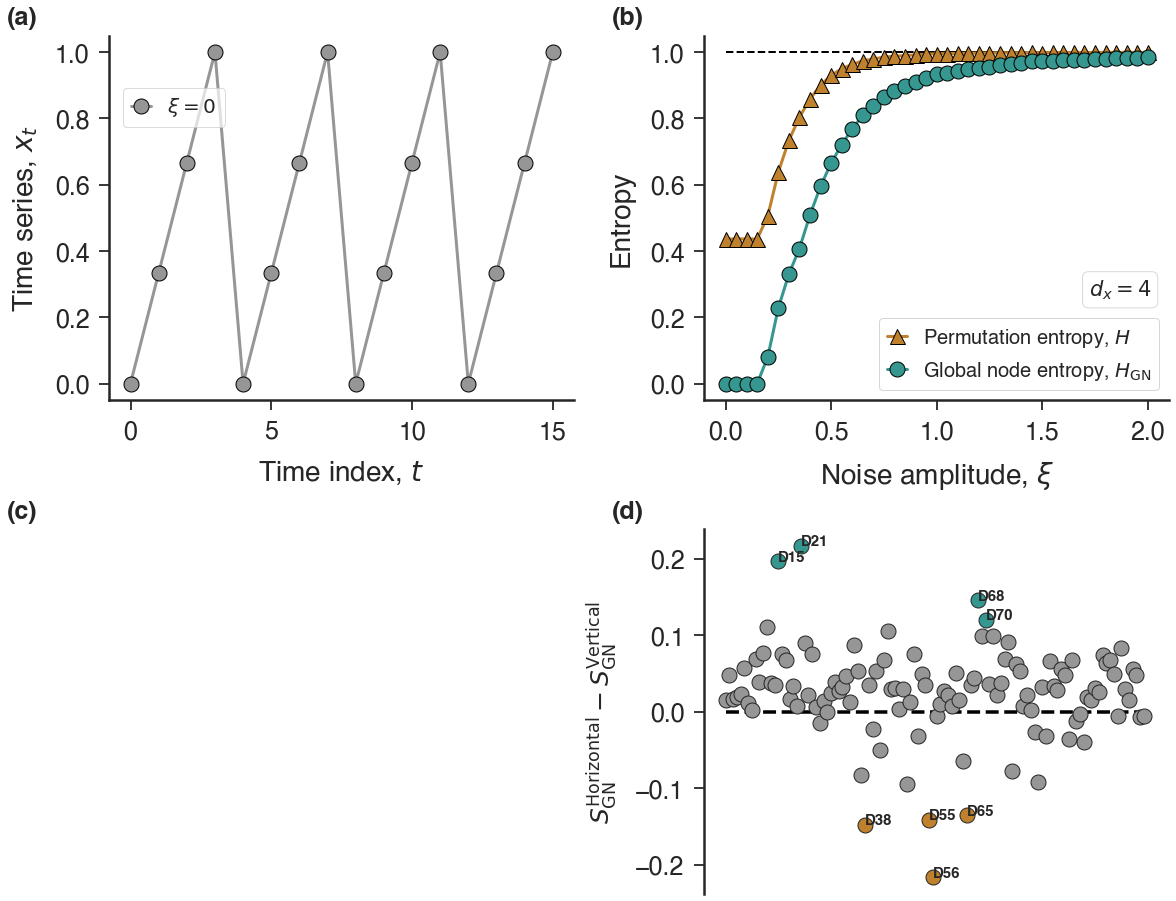

In [25]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16.38, 12.6))
ax    = ax.flatten()

#saw tooth series
ax[0].plot(noisy_sawtooth(dx=4, length=16), '-o', markersize=15, color='#969696', markeredgecolor='black', label=r'$\xi = 0$', zorder=1)
ax[0].set_xlabel('Time index, $t$')
ax[0].set_ylabel('Time series, $x_t$')
ax[0].legend(framealpha=.7, loc=(.03,.75))


#
ax[2].axis('off')
#

#permutation entropy and global node entropy
ordnet_noisy_series    = np.load('data/ordnet_noisy_series.npy')
x_   = np.arange(0,2.02,0.05).round(decimals=2)

for entropy_, m_, c_, l_, i in zip(ordnet_noisy_series[2], ['-^', '-o'], ['#bf812d', '#35978f'], [r'Permutation entropy, $H$', r'Global node entropy, $H_{\rm GN}$'], range(2)):
    if i==1:
        ax[1].plot(x_, entropy_, m_, markersize=15, color=c_,markeredgecolor='black', label=l_)
    else:
        ax[1].plot(x_, entropy_, m_, markersize=15, color=c_,markeredgecolor='black', label=l_)
ax[1].hlines(1, 0, 2, linestyle='--',linewidth=2)
ax[1].set_xlabel(r'Noise amplitude, $\xi$') 
ax[1].set_ylabel(r'Entropy')
ax[1].annotate('$d_x = 4$', (.895,.335), xycoords='axes fraction', ha='center',va='top', fontsize=21, weight='bold',
               bbox={'boxstyle':'round', 'fc':'white', 'ec':'#d9d9d9', 'alpha':1})
ax[1].legend()


#brodatz analysis
brodatz_names  = [s_.split('/')[-1][:-4] for s_ in sorted(glob.glob('data/*.tif'))]

#notice the images are not in the 'data' folder. However, they can be easily download from https://multibandtexture.recherche.usherbrooke.ca/normalized_brodatz.html
brodatz_gne22h_normalized = np.load('data/gne22hor_brodatz.npy')
brodatz_gne22v_normalized = np.load('data/gne22ver_brodatz.npy')


ax[3].set_ylabel(r'$S_{\rm GN}^{\rm Horizontal}-S_{\rm GN}^{\rm Vertical}$', fontsize=25)
ax[3].spines['bottom'].set_visible(False)
ax[3].tick_params(bottom=False, labelbottom=False)
ax[3].plot([0,112],[0,0], '--', color='black',linewidth=3.5, zorder=0)

cnt = 0
for x_, y_ in zip(range(len(brodatz_gne22h_normalized)), brodatz_gne22h_normalized-brodatz_gne22v_normalized):
    if y_>.12:
        ax[3].annotate(brodatz_names[cnt], (x_, y_), weight='bold', fontsize=15)    
        ax[3].plot(x_, y_, 'o', markeredgecolor='#252525', markersize=15, color='#35978f')
        cnt += 1
    elif y_<-.13:
        ax[3].annotate(brodatz_names[cnt], (x_, y_), fontsize=15, weight='bold')
        ax[3].plot(x_, y_, 'o', markeredgecolor='#252525', markersize=15, color='#bf812d')
        cnt += 1
    else:
        ax[3].plot(x_, y_, 'o', markeredgecolor='#252525', markersize=15, color='#969696')
        
for (i, ax_), (x_, y_) in zip(list(enumerate(ax.flatten())), [(-.22,1.03), (-.2,1.03),(-.22,1.03),(-.2,1.03)]):    
    ax_.annotate('('+string.ascii_lowercase[i]+')', (x_, y_), xycoords='axes fraction', fontsize=25, weight='bold')

f.tight_layout()
# f.savefig('figs-pdf/global_node_entropy.pdf', dpi=300, bbox_inches='tight')
# f.savefig('figs-pdf/global_node_entropy_test.svg', dpi=300, bbox_inches='tight')

<span style="font-family:times; font-weight:bold; font-size:1.8em;">`missing_links`</span><a class="anchor" id="chapter9"></a>

<span style="font-family:times; font-weight:bold; font-size:1.4em;">Fig. 9</span><a class="anchor" id="section_fig9"></a>

In [ ]:
#15 minutes to run. Data to plot Fig 8a. Already daved in the 'data' folder.

# flinks_noise = []

# for dx_ in [3,4,5,6]:
#     temp_size = []
#     for size_ in np.unique(np.logspace(1,5,200).astype(int)):
#         temp  = []
#         for _ in range(10):
#             series = np.random.normal(size=size_)
#             temp.append(missing_links(series, dx=dx_, links=False))
#         temp_size.append(np.mean(temp))
#     fstates_noise.append(temp_size)
    
# np.save('data/flinks_noise.npy', flinks_noise)

In [ ]:
#10 minutes to run. Data to plot Fig 8b. Already daved in the 'data' folder

# flinks_logmap = []

# for dx_ in [3,4,5,6]:
#     temp_size = []
#     for size_ in np.unique(np.logspace(1,5,200).astype(int)):
#         temp  = []
#         for _ in range(10):
#             series = logistic_map(n=size_)
#             temp.append(missing_links(series, dx=dx_, return_links=False))
#         temp_size.append(np.mean(temp))
#     flinks_logmap.append(temp_size)
    
# np.save('data/flinks_logmap.npy', flinks_logmap)

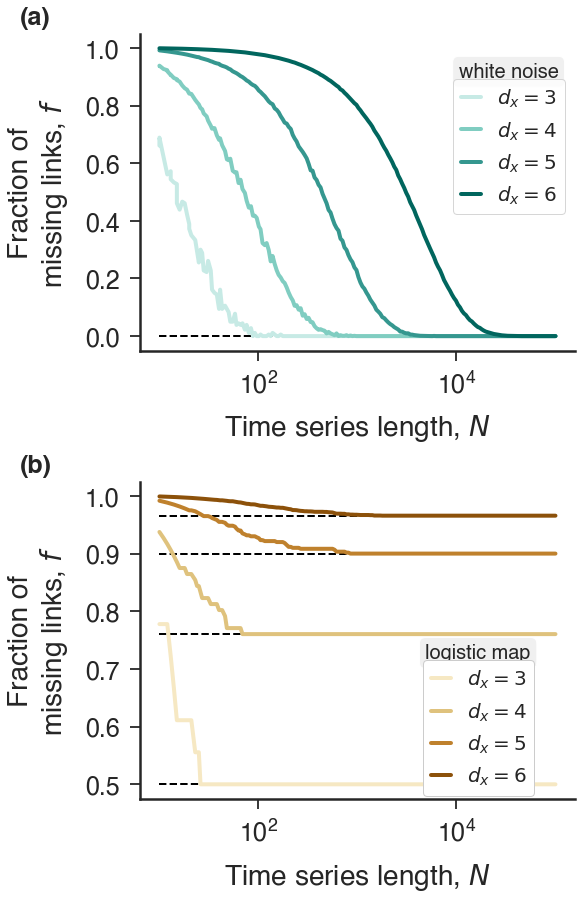

In [13]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(8.19, 12.6))

labels = ['$d_x = 3$', '$d_x = 4$', '$d_x = 5$', '$d_x = 6$']
greens = ['#c7eae5', '#80cdc1', '#35978f','#01665e']
browns = ['#f6e8c3', '#dfc27d', '#bf812d', '#8c510a']


#missing links white noise
flinks_noise = np.load('data/flinks_noise.npy')
ax[0].set_xscale('log')
for y_, l_, c_ in zip(flinks_noise, labels, greens):
    ax[0].plot(np.logspace(1,5,200).astype(int), y_, '-', linewidth=4, color=c_, label=l_)

    
ax[0].hlines(0,10,100000, linestyles='--', linewidth=2, color='black')
ax[0].set_ylabel("Fraction of\nmissing links, $f$")
ax[0].set_xlabel("Time series length, $N$")
ax[0].legend(loc=(.72,.43))
ax[0].annotate('white noise', (.847,.88),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
               bbox={'boxstyle':'round', 'fc':'#f0f0f0', 'alpha':1})


#missing links logistic map
flinks_logmap = np.load('data/flinks_logmap.npy')
ax[1].set_xscale('log')
for y_, l_, c_ in zip(flinks_logmap, labels, browns):
    ax[1].plot(np.unique(np.logspace(1,5,200).astype(int)), y_, '-', linewidth=4, color=c_, label=l_)    

for i in range(4):
    ax[1].hlines(flinks_logmap[i][-1], 10, 100000, linestyle='--', linewidth=2, color='black')
    
ax[1].set_ylabel("Fraction of\nmissing links, $f$")
ax[1].set_xlabel("Time series length, $N$")
ax[1].legend(loc=(.65,.01), framealpha=1)
ax[1].annotate('logistic map', (.777,.46),  va='center', ha='center', xycoords='axes fraction',fontsize=20,
               bbox={'boxstyle':'round', 'fc':'#f0f0f0', 'alpha':1})


for (i, ax_), (x_, y_) in zip(list(enumerate(ax.flatten())), [(-.275,1.03)]*2):    
    ax_.annotate('('+string.ascii_lowercase[i]+')', (x_, y_), xycoords='axes fraction', fontsize=25, weight='bold')

f.tight_layout()
# f.savefig('figs-pdf/missing_links_vert.pdf', dpi=300, bbox_inches='tight')